# Setup and Data Import

In [10]:
import pandas as pd

data = pd.read_csv('sample_data/AviationData.csv', delimiter=',', header='infer', encoding='latin1')

data.head(10)

<ipython-input-10-f71ff2a32440>:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('sample_data/AviationData.csv', delimiter=',', header='infer', encoding='latin1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


# Clean and Normalize the data

In [20]:
# Convert columns to numeric type
data['Latitude'] = pd.to_numeric(data['Latitude'], errors='coerce')
data['Longitude'] = pd.to_numeric(data['Longitude'], errors='coerce')
data['Total.Fatal.Injuries'] = pd.to_numeric(data['Total.Fatal.Injuries'])

# Convert date/time columns to datetime type
data['Event.Date'] = pd.to_datetime(data['Event.Date'])
data['Publication.Date'] = pd.to_datetime(data['Publication.Date'])

# Filter the data to keep only accidents after 1981
data = data[data['Event.Date'].dt.year >= 1982]

# Convert text to lowercase
data['Location'] = data['Location'].str.lower()

# Remove leading/trailing whitespace
data['Injury.Severity'] = data['Injury.Severity'].str.strip()

data.head()

<ipython-input-20-300e7c487d2a>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Publication.Date'] = pd.to_datetime(data['Publication.Date'])


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"pullman, wa",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01,1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"east hanover, nj",United States,NaN,NaN,N58,HANOVER,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1982-01-01,1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"jacksonville, fl",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,1982-01-01,1982
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"hobbs, nm",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,1982-01-01,1982
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"tuskegee, al",United States,NaN,NaN,NaN,TUSKEGEE,...,NaN,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,1982-01-01,1982


# Vis


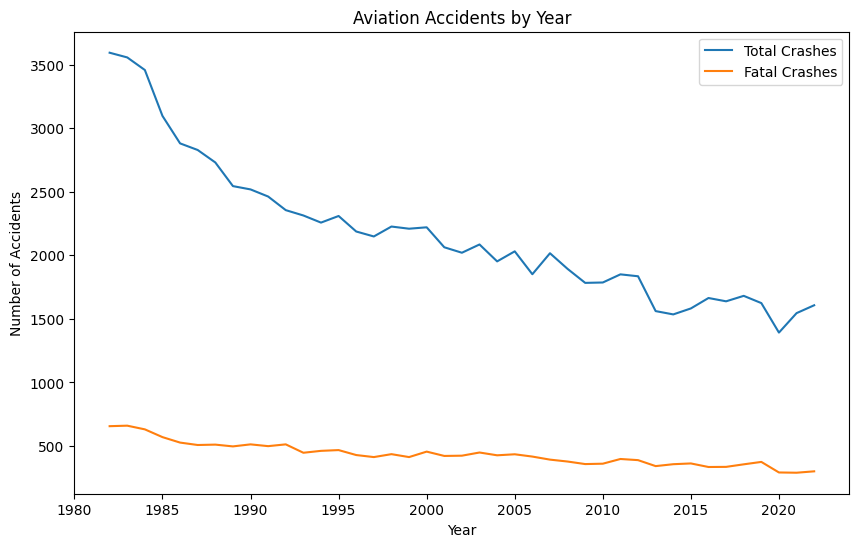

In [21]:
import matplotlib.pyplot as plt

data['Event.Date'] = pd.to_datetime(data['Event.Date'])

# Extract the year from Event.Date
data['Year'] = data['Event.Date'].dt.year

# Group the data by Year and calculate the total crashes and fatal crashes
grouped_data = data.groupby('Year')['Event.Id'].count()
fatal_data = data[data['Total.Fatal.Injuries'] > 0].groupby('Year')['Event.Id'].count()

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(grouped_data.index, grouped_data.values, label='Total Crashes')
plt.plot(fatal_data.index, fatal_data.values, label='Fatal Crashes')

# Set the plot title and labels
plt.title('Aviation Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')

# Add a legend
plt.legend()

# Show the plot
plt.show()


